In [2]:
### 2 Random Walk On Networks
options(warn=-1)
library('igraph')
library('Matrix')
library('pracma')

In [3]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

freq = function (vertex_sequence, num_vertex, num_steps) {
    name = names(table(vertex_sequence))
    count = as.numeric(table(vertex_sequence))
    result = seq_len(0)
    for (i in 1:num_vertex){
        if(i %in% name){
            result = c(result, count[i]/(num_steps + 1))
        }
        else
            result = c(result, 0)
    }
    result[is.na(result)] = 0
    return(result)
}

random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    v = start_node
    for(i in 1:num_steps){
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    return(v)
}

random_walk_c = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    v = start_node
    vert = seq_len(0)
    vert = c(vert, start_node)
    for(i in 1:num_steps){
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
        vert = c(vert, v)
    }
    return(vert)
}
    

#### (a) 

In [29]:
p = 0.01
er2 <- erdos.renyi.game(1000, p, directed=F)
dist_matrix = distances(er2, v=V(er2), to=V(er2))
mean_st = seq_len(0)
std_st = seq_len(0)

for(t in seq(1,50)){
    dist = seq_len(0)
    for(i in seq(1,10)){
        start = sample(1:vcount(er2), 1)
        v = random_walk(er2, t, start)
        dist = c(dist, dist_matrix[start, v])
    }
    mean_st = c(mean_st, mean(dist))
    std_st = c(std_st, var(dist))
}

#### (b)  
We calcualted the mean and variance using a 50 step randome and 10 repeatitions per step size for variance and mean. The relationship is shown below. It seems to converge as the t grows

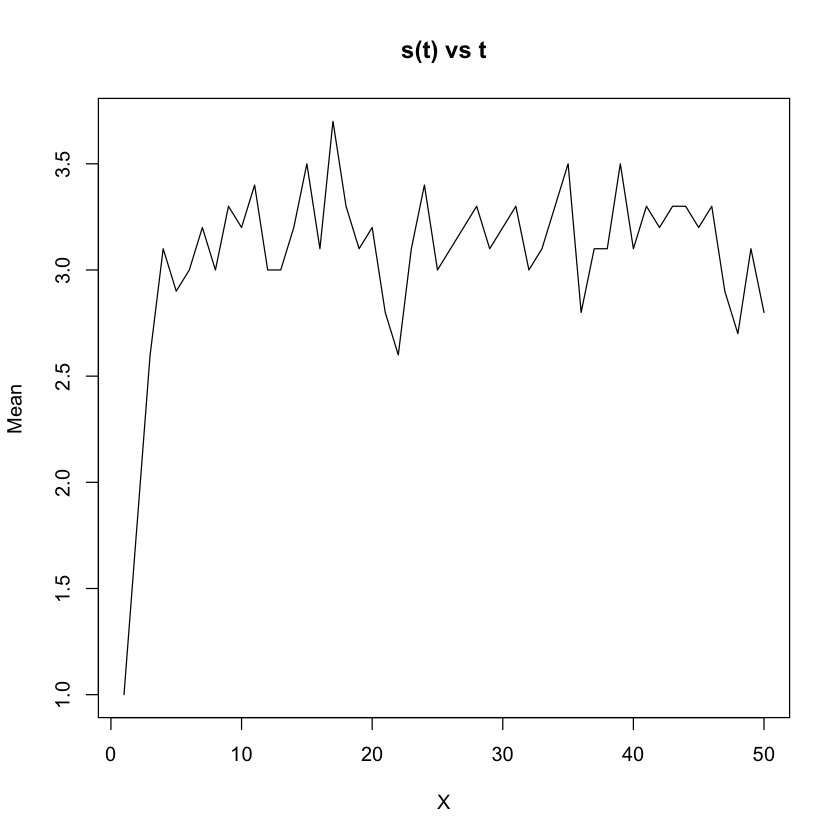

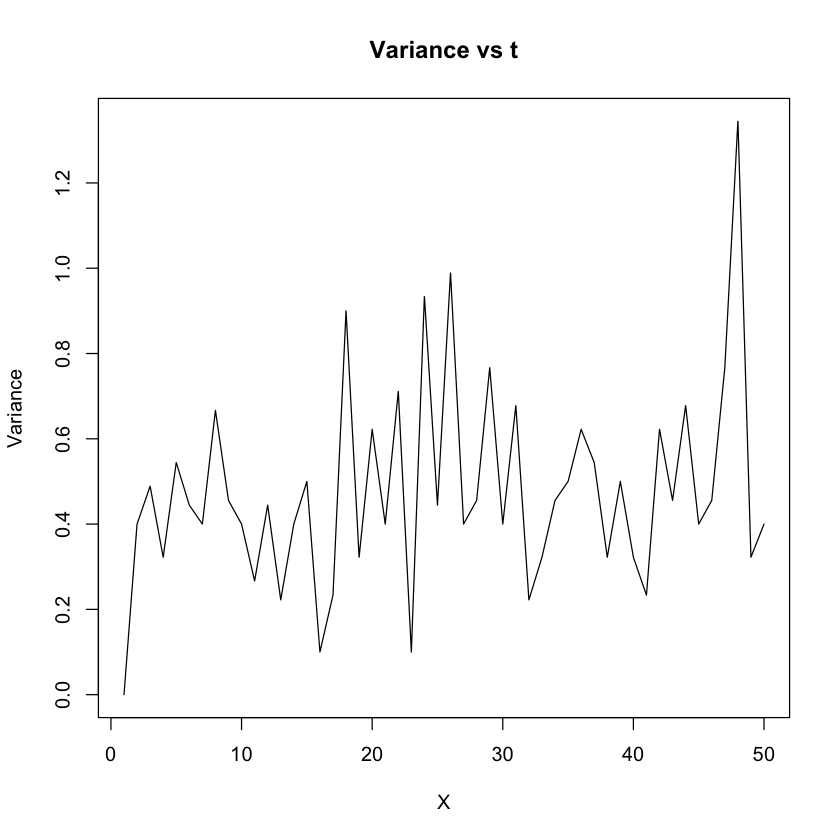

In [37]:
X = seq(1,50)
plot(x=X, y=mean_st,ylab= "Mean", X="Time Step" ,main="s(t) vs t", type='l')
plot(x=X, y=std_st,  ylab= "Variance",X="Time Step", main="Variance vs t", type='l')

#### (c) 

The result of random walk is very similar to the degree distribution of the graph. Since random walk depends on the structure of the orginal graph and thus has similar degree distribution

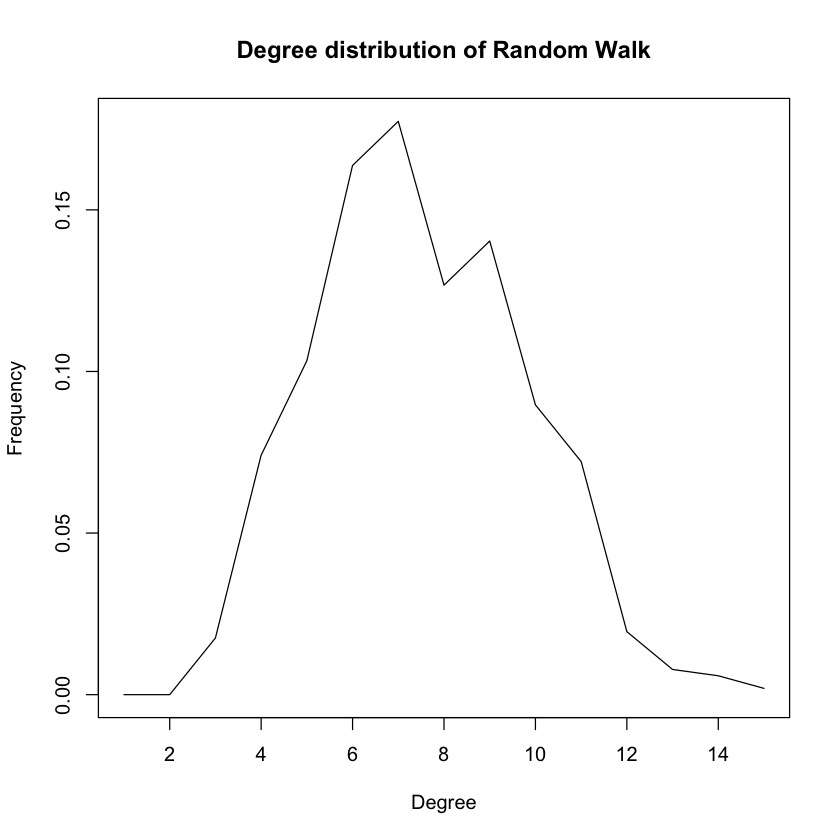

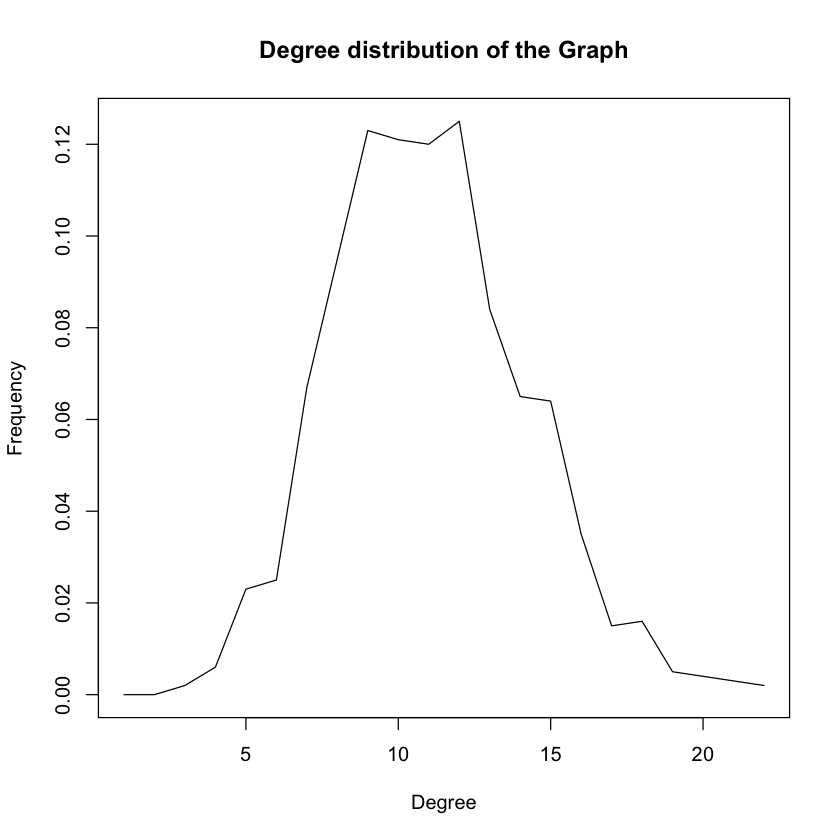

In [7]:
start <- sample(1:vcount(er2), 1)
vert  <- random_walk_c(er2, start, 1000)

plot(degree.distribution(subgraph(er2, vert)),main="Degree distribution of Random Walk",xlab="Degree",ylab="Frequency", type='l')
plot(degree.distribution(er2),main="Degree distribution of the Graph",xlab="Degree",ylab="Frequency", type='l')

In [56]:
### (D) Use Different n

func21 = function (n){
    set.seed(1)
    p = 0.01
    graph <- erdos.renyi.game(n, p, directed=F)
    start = sample(1:vcount(graph), 1)
    dist_matrix = distances(graph, v=V(graph), to=V(graph))
    vert = random_walk_c(graph, n, start)
    mean_st = seq_len(0)
    std_st = seq_len(0)
    for(t in seq(1,50)){
        dist = seq_len(10)
        for(i in seq(1,5)){
            start = sample(1:vcount(graph), 1)
            v = random_walk(graph, t, start)
            dist = c(dist, dist_matrix[start, v])
        }
        mean_st = c(mean_st, mean(dist))
        std_st = c(std_st, var(dist))
    }

    X = seq(1,50)
    
    plot(x=X, y=mean_st,ylab= "Mean", X="Time Step" ,main=sprintf("s(t) vs t, n=%s", n), type='l')
    plot(x=X, y=std_st,  ylab= "Variance",X="Time Step", main=sprintf("Variance vs. t n=%s", n), type='l')
}

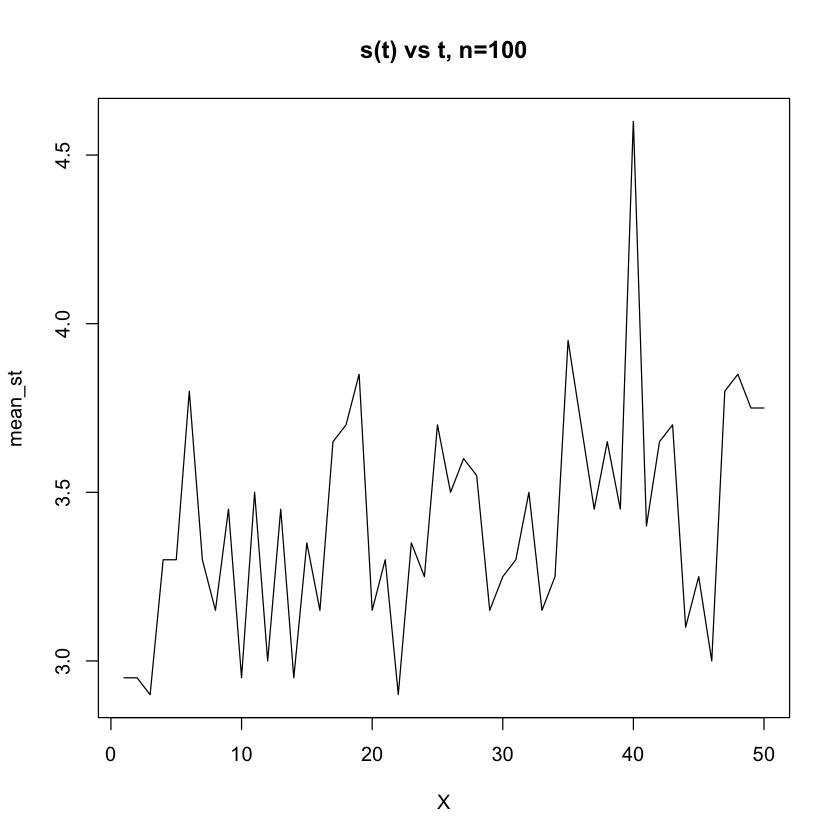

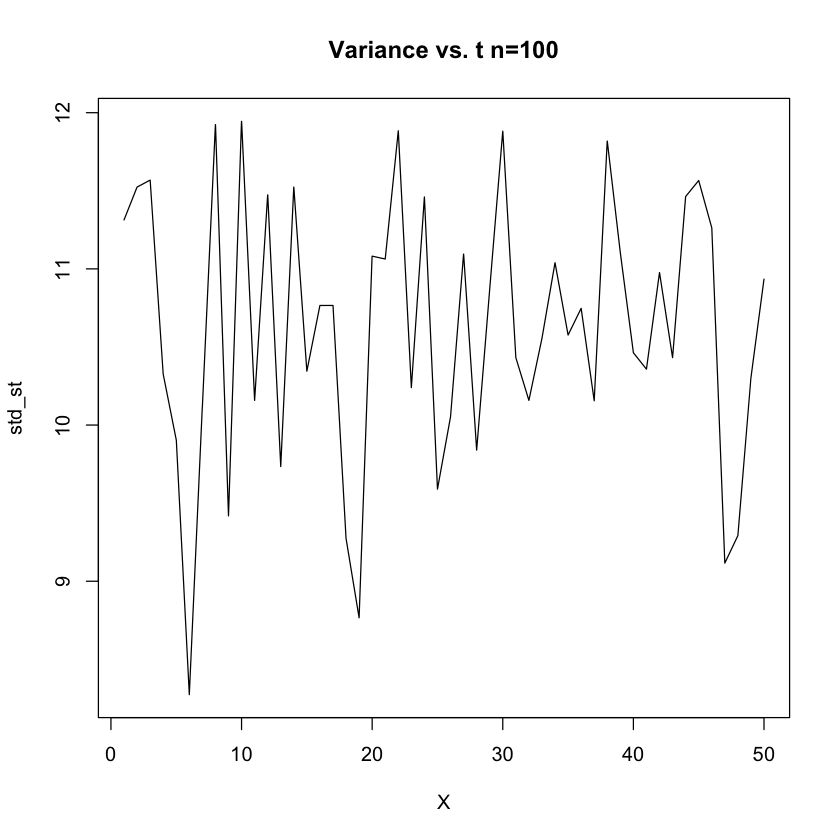

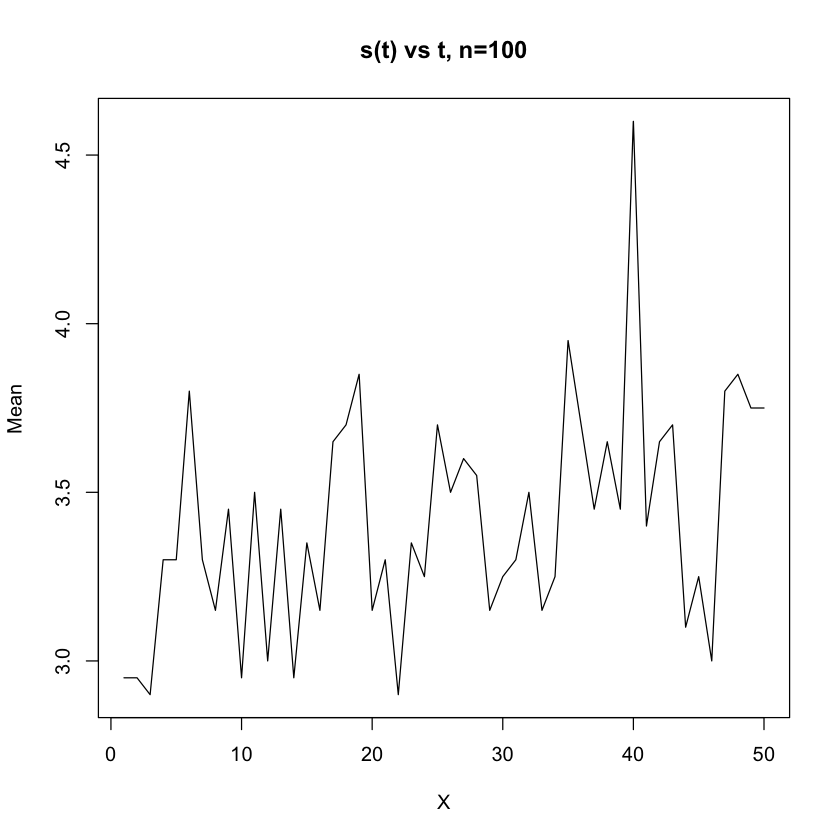

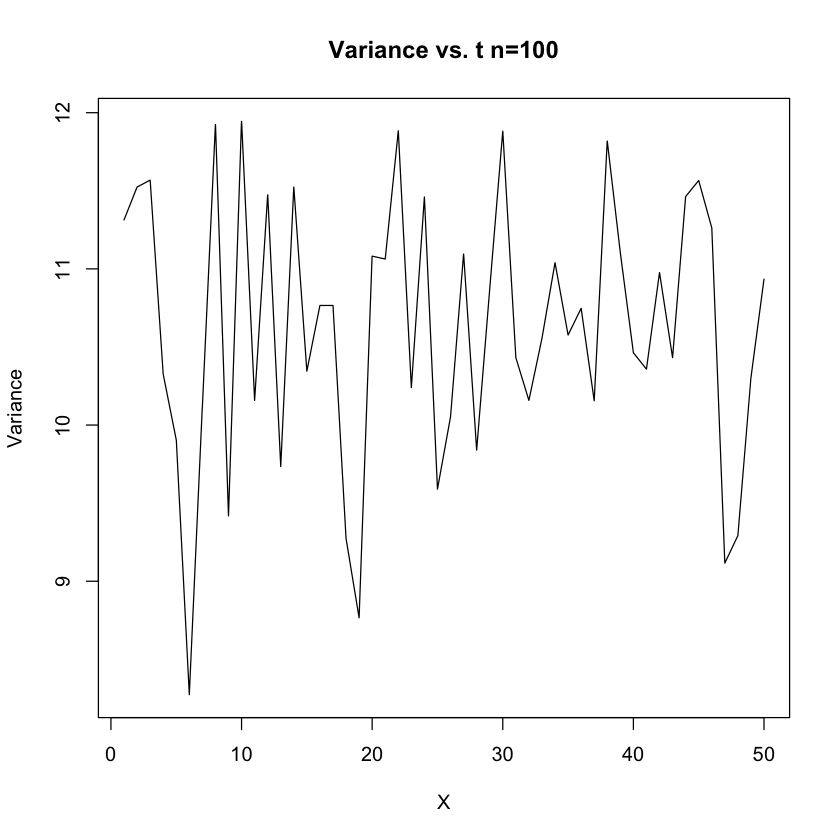

In [42]:
func21(100)

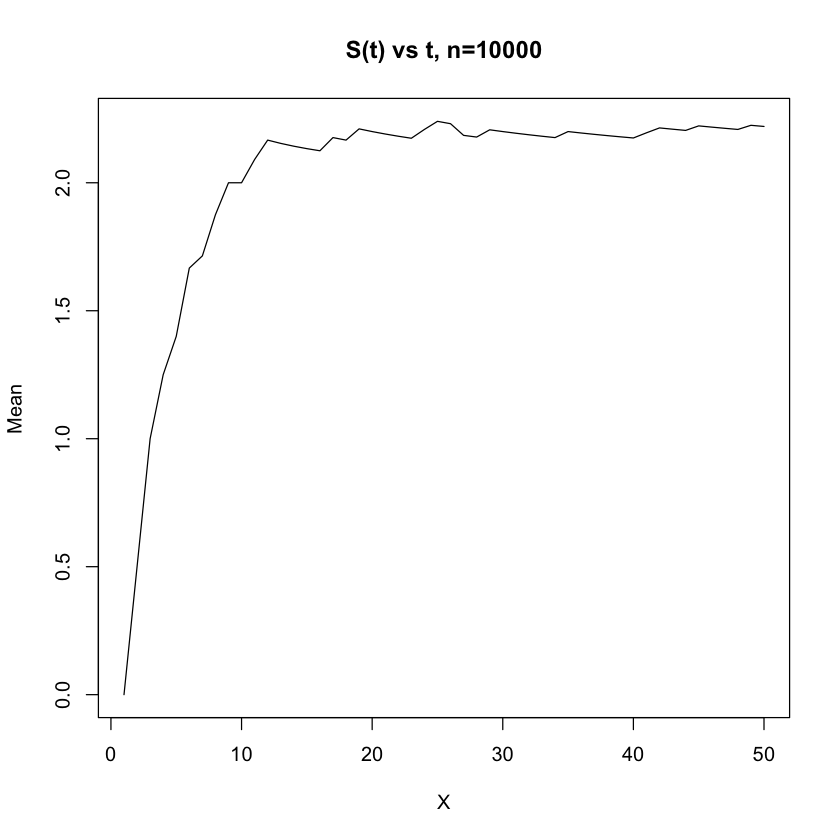

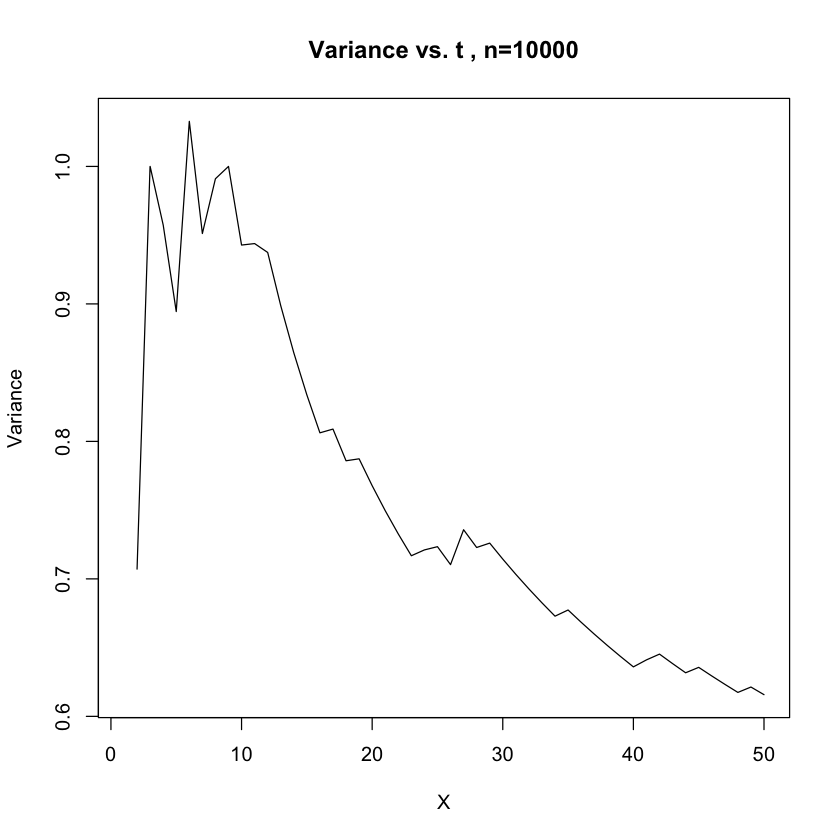